# Trabajo Final de Machine Learning - Etapa 1

## Introducción

Este trabajo constituye el proyecto final de la materia de Machine Learning. El objetivo principal es analizar una base de datos en la que las columnas no tienen un significado claro, lo que dificulta la interpretación inicial de los datos. Por esta razón, será necesario explorar las estadísticas descriptivas del conjunto de datos, ya que serán la principal guía para identificar las características más relevantes.

Además, se desarrollará un modelo de Machine Learning capaz de predecir si una transacción en un e-commerce es fraudulenta o no. Para ello, se utilizará un dataset que contiene 19 variables, etiquetadas de "A" a "S", una columna que indica el monto de la transacción, y la variable de respuesta denominada "fraude," que señala si la transacción es fraudulenta (1) o no (0). El modelo será ajustado y optimizado mediante la selección de parámetros para mejorar su precisión y rendimiento en la detección de transacciones fraudulentas.

no obstante para llevar a cabo este trabajo nos vamos a basar de un indice general el cual nos va a mostrar la ruta que deberemos de seguir.

## Indice: 

1. Introducción 
2. Indice
3. Analisis estadistico.
    * Analisis general
    * Analisisi variables numericas
    * analisis variables categoricas
4. Limpieza de datos
5. Entrenar modelo
6. Ajustar modelo 
7. Probar modelo
8. modelo iteractivo de predicciones 



Lo primero que haremos será realizar un análisis general de los datos. Para esto, descargaremos el dataset y analizaremos qué columnas tenemos, cuántas muestras existen y evaluaremos un aspecto importante: si los datos están muy desbalanceados. Este factor influirá considerablemente en la elección del modelo. Además, dividiremos los datos en dos tipos para analizarlos por separado: por un lado, los datos numéricos, y por otro, los datos de tipo "object," que en el fondo representan datos de tipo cadena (string).

## Analisis datos general

Ahora hablaremos de las librerías que utilizaremos en todo el proceso:

* **Pandas**: Es una biblioteca esencial para el manejo y análisis de datos estructurados en Python. Nos permite trabajar con estructuras de datos como DataFrames, lo que facilita la manipulación, limpieza y transformación de los datos de manera eficiente.

<img src="imagenes/biblioteca_pandas.jpg" width="200" style="display: block; margin: auto;">


* **Seaborn**: Es una biblioteca de visualización de datos basada en Matplotlib que permite crear gráficos estadísticos atractivos y fáciles de interpretar. Seaborn simplifica la creación de gráficos complejos, como distribuciones, gráficos de correlación y relaciones entre variables, y es ideal para el análisis exploratorio de datos (EDA).

<img src="imagenes\logo-wide-lightbg.png" width="200" style="display: block; margin: auto;">

* **Matplotlib**: Es una biblioteca de gráficos fundamental en Python. Permite crear visualizaciones de alta calidad, personalizables y detalladas, lo cual es útil para representar patrones y tendencias en los datos. Matplotlib se usa a menudo junto con Seaborn para una mayor flexibilidad en la personalización de gráficos.
<img src="imagenes\descarga.jpeg" width="200" style="display: block; margin: auto;">

* **Scipy**: Es una biblioteca que proporciona herramientas avanzadas para realizar operaciones matemáticas, científicas y de ingeniería. En este proyecto, se utilizará especialmente para cálculos de estadística, como la matriz de correlación de Pearson y la correlación de Spearman, que nos ayudan a entender la relación entre variables.
<img src="imagenes\SciPy.jpeg" width="200" style="display: block; margin: auto;">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
#%matplotlib inline

Entonces, lo que haremos en este caso es que, una vez descargadas las librerías y los módulos necesarios, procederemos a cargar los datos que vamos a utilizar. Estos datos se encuentran en un archivo CSV llamado "TechnicalInterviewFraudPrevention."

In [19]:
datos = pd.read_csv('TechnicalInterviewFraudPrevention.csv')

In [20]:
datos

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,3,0.00,0.00,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,UY,...,0,3,1,0,2,0.00,0.00,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,1,0.00,0.00,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,BR,...,1,1,1,0,1,0.00,0.00,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,BR,...,1,1,1,0,5,0.00,0.00,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,BR,...,0,1,1,0,1,0.00,0.00,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,BR,...,0,2,1,0,1,0.00,0.00,29.00,36.97,1


In [21]:
dimensiones=datos.shape
print(f"el archivo tiene {dimensiones[0]} filas y {dimensiones[1]} columnas")

el archivo tiene 16880 filas y 21 columnas


Como podemos observar, tenemos 21 columnas y 16,880 filas, por lo que podemos decir que esta es una base de datos relativamente mediana, ya que no cuenta con demasiadas muestras. Esto será importante porque, si notamos que los datos están desbalanceados, es decir, que hay más datos de una clase que de otra, nos veremos obligados a realizar una estratificación de los datos. En este caso, la mejor estratificación sería en función de la variable de respuesta, para mantener siempre una proporción adecuada entre los datos de transacciones fraudulentas y no fraudulentas.

In [22]:
datos.columns = datos.columns.str.lower().str.replace(' ','_')
strings = list(datos.dtypes[datos.dtypes == 'object'].index)
for col in strings:
    datos[col] = datos[col].str.lower().str.replace(' ','_')

In [23]:
datos["q"] = datos["q"].str.replace(",", "")
datos["r"] = datos["r"].str.replace(",", "")
datos["monto"] = datos["monto"].str.replace(",", "")

In [24]:
datos["q"] = datos["q"].astype(float)
datos["r"] = datos["r"].astype(float)
datos["monto"] = datos["monto"].astype(float)

In [25]:
datos

,a,b,c,d,e,f,g,h,i,j,...,l,m,n,o,p,q,r,s,monto,fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,uy,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,uy,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,uy,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,uy,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,uy,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,br,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,br,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,br,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,br,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


En las filas anteriores, podemos observar lo siguiente: las columnas `q`, `r` y `monto` contienen datos numéricos, pero están clasificadas como datos de tipo string, por lo que necesitamos cambiar su tipo de dato al adecuado. Sin embargo, surge un problema, ya que muchas de las muestras en estas columnas tienen números en un formato con comas, es decir, en un formato como `$1,200.25$`, donde la coma indica miles y el punto, decimales. Antes de convertir estas columnas al tipo de dato adecuado, primero eliminaremos la coma usando un reemplazo que la sustituya por un carácter vacío.


In [26]:
Cantidad_datos=len(datos)
caracteristicas_columnas = pd.DataFrame({
    "columnas": datos.columns,
    "tipos datos": datos.dtypes,
    "datos_nulos":datos.isnull().sum(),
    "porcentaje datos nulos":round((datos.isnull().sum()*100)/Cantidad_datos,1),
    "datos no nulos": datos.notnull().sum(),
    "porcentaje datos no nulos": round((datos.notnull().sum()*100)/Cantidad_datos,1),
    "Cantidad datos":len(datos)
})
caracteristicas_columnas

,columnas,tipos datos,datos_nulos,porcentaje datos nulos,datos no nulos,porcentaje datos no nulos,Cantidad datos
a,a,int64,0,0.0,16880,100.0,16880
b,b,int64,0,0.0,16880,100.0,16880
c,c,float64,3197,18.9,13683,81.1,16880
d,d,int64,0,0.0,16880,100.0,16880
e,e,int64,0,0.0,16880,100.0,16880
f,f,float64,0,0.0,16880,100.0,16880
g,g,float64,0,0.0,16880,100.0,16880
h,h,int64,0,0.0,16880,100.0,16880
i,i,int64,0,0.0,16880,100.0,16880
j,j,object,0,0.0,16880,100.0,16880


Ahora queremos identificar qué columnas de la base de datos tienen datos faltantes y cuántos valores faltan en cada una. Esto es importante porque nos permitirá decidir qué columnas con datos faltantes podemos conservar y cuáles no. En este caso, descartaremos directamente la columna `K`, ya que más del 75% de sus datos están vacíos, y llenar esos datos solo incrementaría el ruido en el modelo, algo que queremos evitar. Por otro lado, la columna `C` tiene 3,000 datos vacíos, lo cual es mucho menos que la mitad de sus valores, por lo que la conservaremos por ahora. Como `C` es de tipo flotante, lo más adecuado sería llenarla con valores de tendencia central. Alternativamente, podemos analizar su distribución y varianza para determinar otro método más adecuado para completar los datos faltantes.

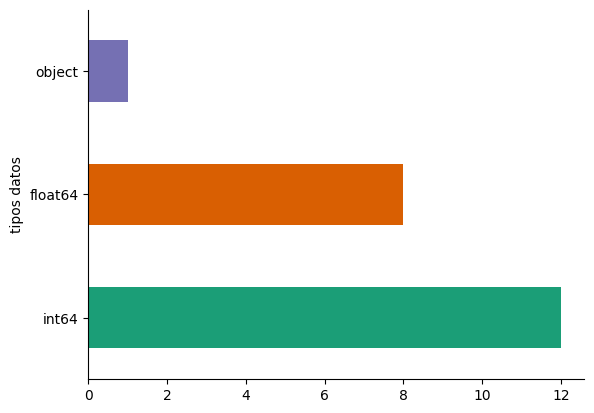

In [27]:
caracteristicas_columnas.groupby('tipos datos').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

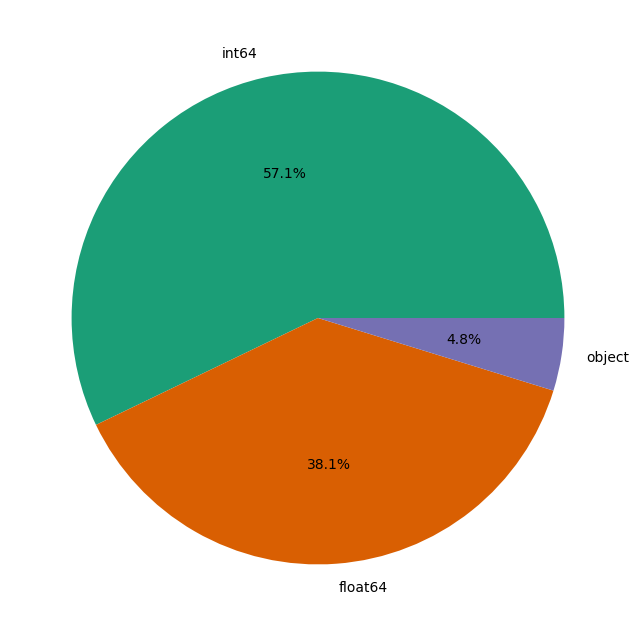

In [28]:
counts = caracteristicas_columnas.groupby('tipos datos').size()
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.gca().set_aspect('equal')

Como es común, veamos la tabla para identificar los tipos de datos y cómo se distribuyen.

In [29]:
data = []

for col in datos.columns:
    # Verifica si la columna es de tipo numérico
    if datos[col].dtype in ['int64', 'float64']:
        # Obtén solo los primeros 5 valores únicos
        unique_values = datos[col].unique()[:5]
    else:
        # Obtén todos los valores únicos si es de tipo object o str
        unique_values = datos[col].unique()

    # Almacena la información en un diccionario
    data.append({
        'Column': col,
        'Unique Values': unique_values,
        'Number of Unique Values':datos[col].nunique(),
        'Data Type': datos[col].dtype
    })

# Crea un DataFrame a partir de la lista de diccionarios
df_summary = pd.DataFrame(data)

# Muestra el DataFrame
df_summary

,Column,Unique Values,Number of Unique Values,Data Type
0,a,"[0, 9, 1, 10, 11]",21,int64
1,b,"[10, 7, 16, 8, 12]",21,int64
2,c,"[50257.0, 29014.0, 92.0, 50269.0, 8180.0]",9782,float64
3,d,"[0, 1, 12, 4, 3]",31,int64
4,e,"[0, 1, 2, 4, 3]",23,int64
5,f,"[0.0, 0.014, 0.007, 0.25, 0.19]",153,float64
6,g,"[0.0, 0.058, 0.005, 0.033, 0.104]",106,float64
7,h,"[0, 9, 1, 4, 3]",14,int64
8,i,"[0, 1, 3, 2, 4]",17,int64
9,j,"[uy, mx, us, es, ar, ca, gb, ua, cl, co, it, g...",19,object


Ahora vamos a analizar los valores únicos de la tabla para determinar qué podemos hacer con ellos. Observamos que las columnas `C`, `S` y `monto` tienen muchos valores únicos, lo cual nos puede indicar lo siguiente:

1. **Alta Variedad de Datos**: La columna probablemente representa una característica con mucha diversidad, como un identificador único (ID), nombres de productos o categorías muy específicas que pueden tener un valor único o cercano a único para cada fila.

2. **Posible Necesidad de Agrupación o Simplificación**: Como vemos que hay tantos datos unicos podríamos considerar agruparlos en categorías más amplias o generalizar algunos de los valores para reducir la cardinalidad (número de valores únicos) de la columna.

3. **Consideración para el Modelo**: Si planeamos utilizar esta columna en un modelo de Machine Learning, demasiados valores únicos pueden aumentar la complejidad del modelo sin necesariamente mejorar su rendimiento. En modelos como árboles de decisión, esto podría llevar a un sobreajuste, y en otros modelos puede incrementar innecesariamente el tiempo de cómputo.

4. **Posible Señal de Datos Atípicos o Anómalos**:para las columnas que son numéricos y presentan muchos valores únicos, puede ser útil analizar si existen valores atípicos que podrían estar afectando la interpretación.


<Axes: ylabel='count'>

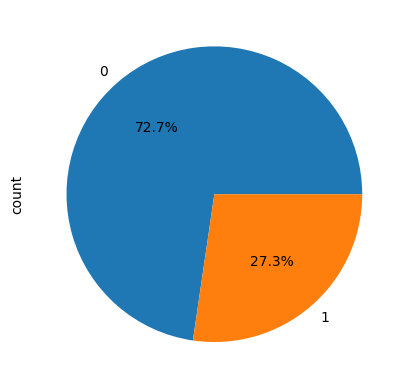

In [31]:
datos['fraude'].value_counts().plot.pie(autopct='%1.1f%%')

Ahora podemos observar algo crucial en la base de datos: está desbalanceada a favor de la clase 0, que indica que no hay fraude. Esto es normal, ya que en el contexto de transacciones, lo común es que la mayoría no sean fraudulentas.

* **Sesgo en el Modelo de Machine Learning**: En problemas de clasificación, los algoritmos tienden a favorecer la clase mayoritaria porque es más fácil lograr precisión al predecir la clase más común. Esto puede llevar a un sesgo en el modelo y a una baja capacidad para identificar correctamente la clase minoritaria.

* **Desempeño de Métricas Engañoso**: Métricas como la precisión (accuracy) pueden ser engañosas en un conjunto de datos desbalanceado. Por ejemplo, si una clase representa el 90% de los datos, un modelo que siempre predice esa clase tendrá un 90% de precisión, pero no será útil para predecir la clase minoritaria. En su lugar, métricas como el F1-score, recall (sensibilidad) y AUC-ROC (área bajo la curva ROC) pueden proporcionar una evaluación más precisa del desempeño del modelo.

* **Dificultad en Generalización**: Un modelo entrenado en una base de datos desbalanceada puede tener dificultades para generalizar en nuevas observaciones, especialmente si estas contienen más ejemplos de la clase minoritaria. Esto puede provocar un bajo rendimiento en situaciones reales o de producción.

## Datos numericos


Ahora bien lo que haremos es separar los dato con respecto a los datos numericos y empezar a sacar estadisticas muy importantes sobre estos

In [32]:
datos_numericos = datos.select_dtypes(include=['int64', 'float64'])
print("la cantidad de datos numericos que hay en la tabla es: ",len(datos_numericos.columns) )

la cantidad de datos numericos que hay en la tabla es:  20


In [33]:
datos_numericos.drop(['k'], axis=1, inplace=True)

En este caso eliminamos la variable k por las razones ya mensionadas anteriormente

In [34]:
datos_numericos

,a,b,c,d,e,f,g,h,i,l,m,n,o,p,q,r,s,monto,fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,0,2,1,0,1,0.0,0.0,29.00,36.97,1


In [35]:
datos_numericos.describe().T

,count,mean,std,min,25%,50%,75%,max
a,16880.0,0.309242,1.094064,0.00,0.0000,0.000,0.0000,30.00
b,16880.0,7.645379,4.686494,-1.00,4.0000,7.000,11.0000,20.00
c,13683.0,39235.339984,91045.252879,0.00,1172.0000,6173.000,26888.5000,617324.00
d,16880.0,0.198697,2.042959,0.00,0.0000,0.000,0.0000,180.00
e,16880.0,0.433709,1.537297,0.00,0.0000,0.000,0.0000,45.00
f,16880.0,0.015878,0.098730,0.00,0.0000,0.000,0.0000,1.00
g,16880.0,0.005200,0.059419,0.00,0.0000,0.000,0.0000,1.00
h,16880.0,0.050296,0.531060,0.00,0.0000,0.000,0.0000,21.00
i,16880.0,0.144076,0.824761,0.00,0.0000,0.000,0.0000,24.00
l,16880.0,0.432346,0.663860,0.00,0.0000,0.000,1.0000,7.00


Como podemos apreciar la columna c tiene una varianza increiblermte grande y datos faltantes, asiq ue hay dos formas de solucionar esto o eliminar la columna o agrupar la columna en rangos, en este caso lo que voy a hacer es eliminar la columna.

In [36]:
datos_numericos.drop(['c'], axis=1, inplace=True)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_histograma(datos, columna, hue="fraude", bins=30, tamano=(10, 10)):
    plt.figure(figsize=tamano)
    sns.histplot(data=datos, x=columna, hue=hue, bins=bins, kde=True)
    plt.title(f"Histograma de '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.show()


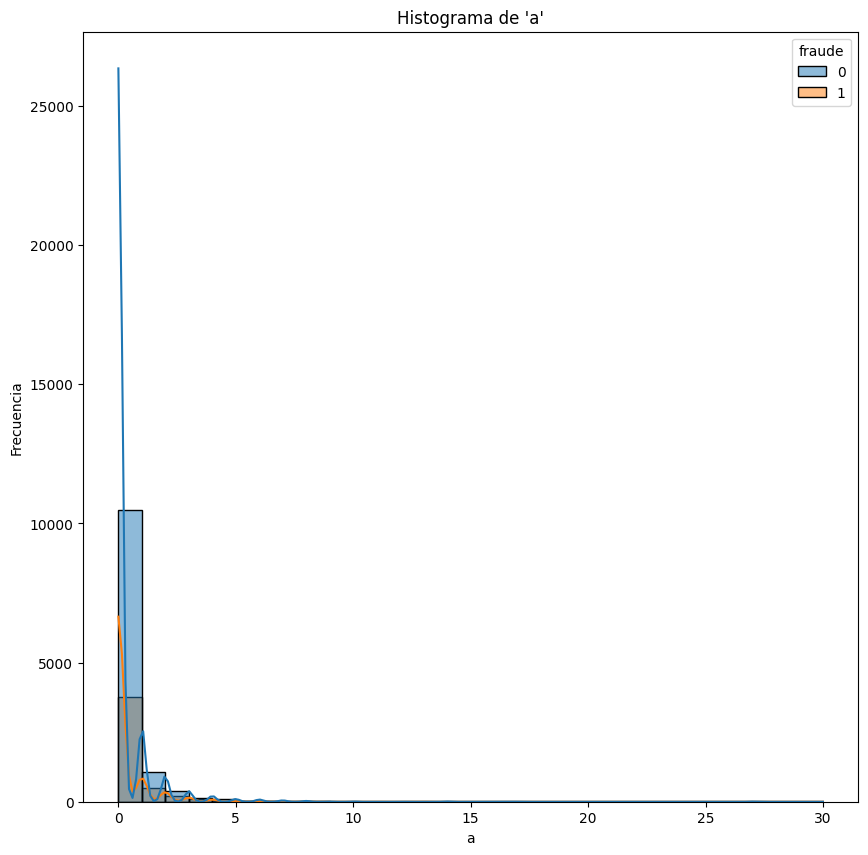

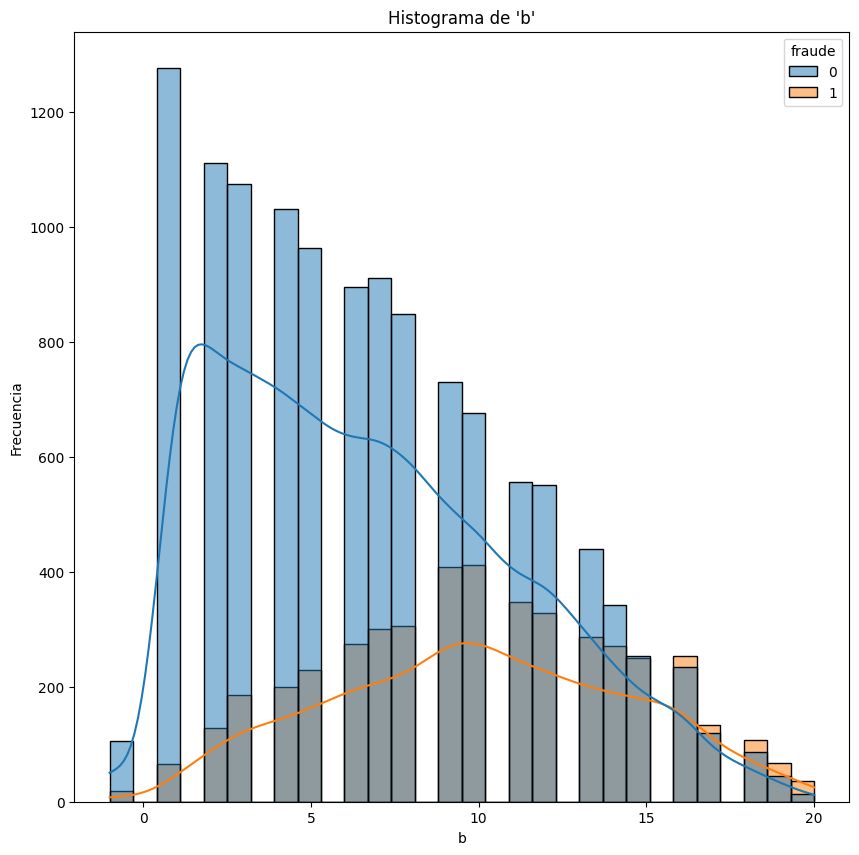

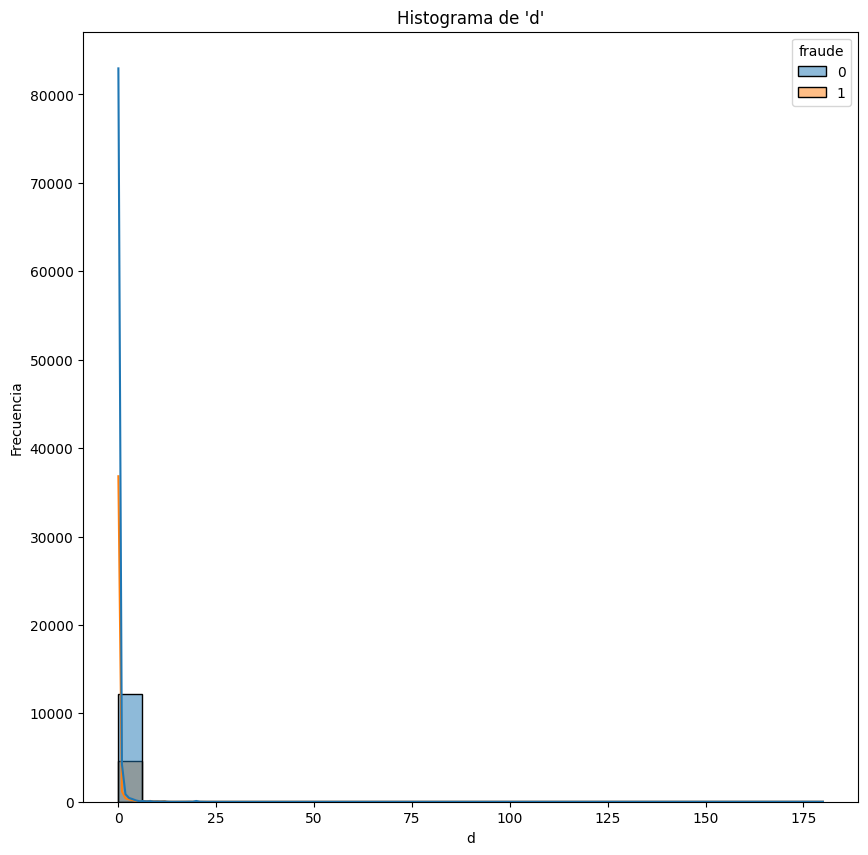

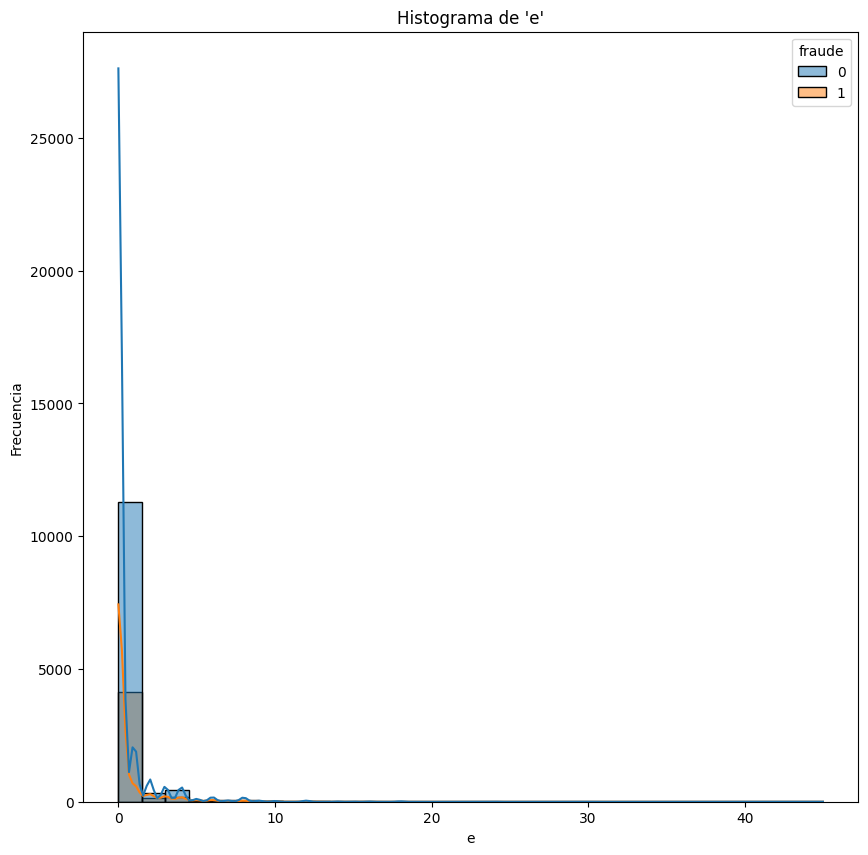

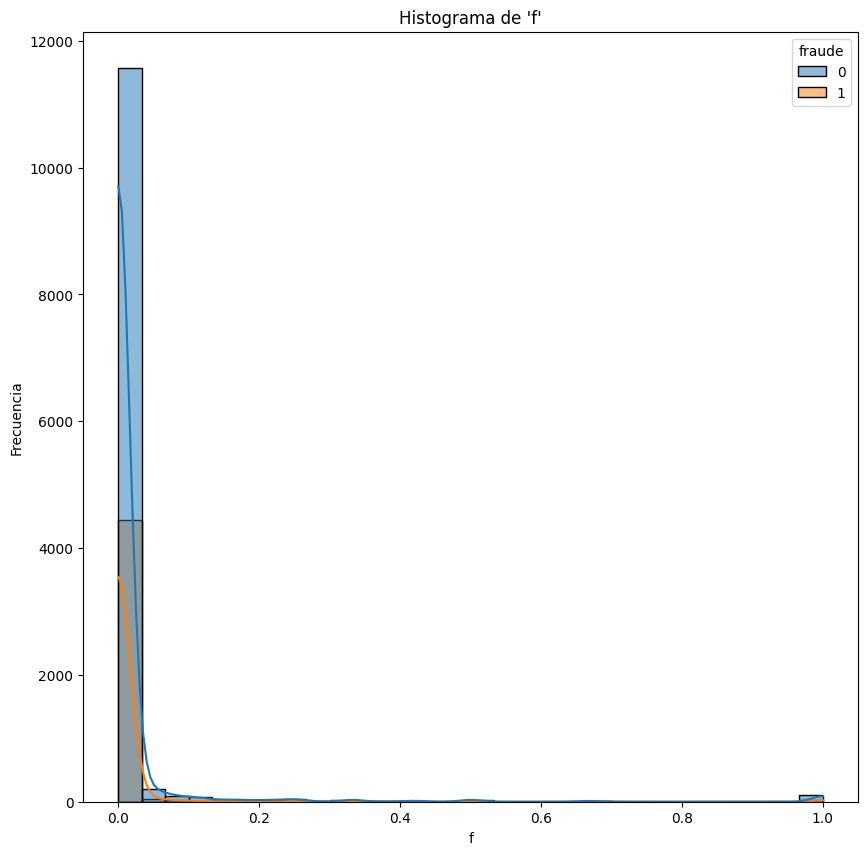

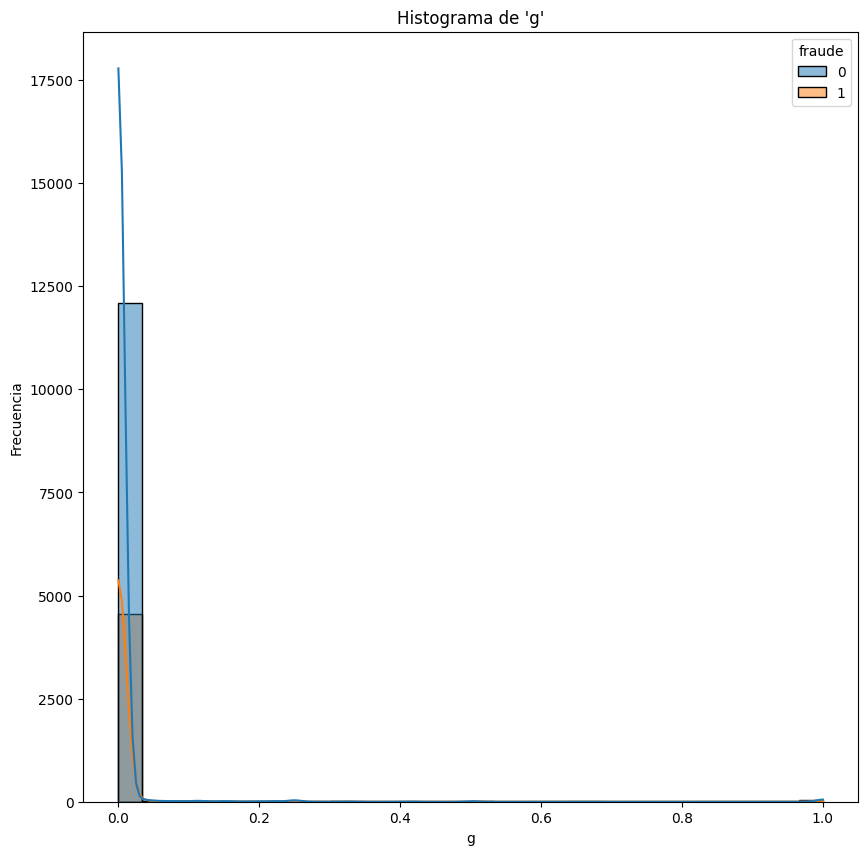

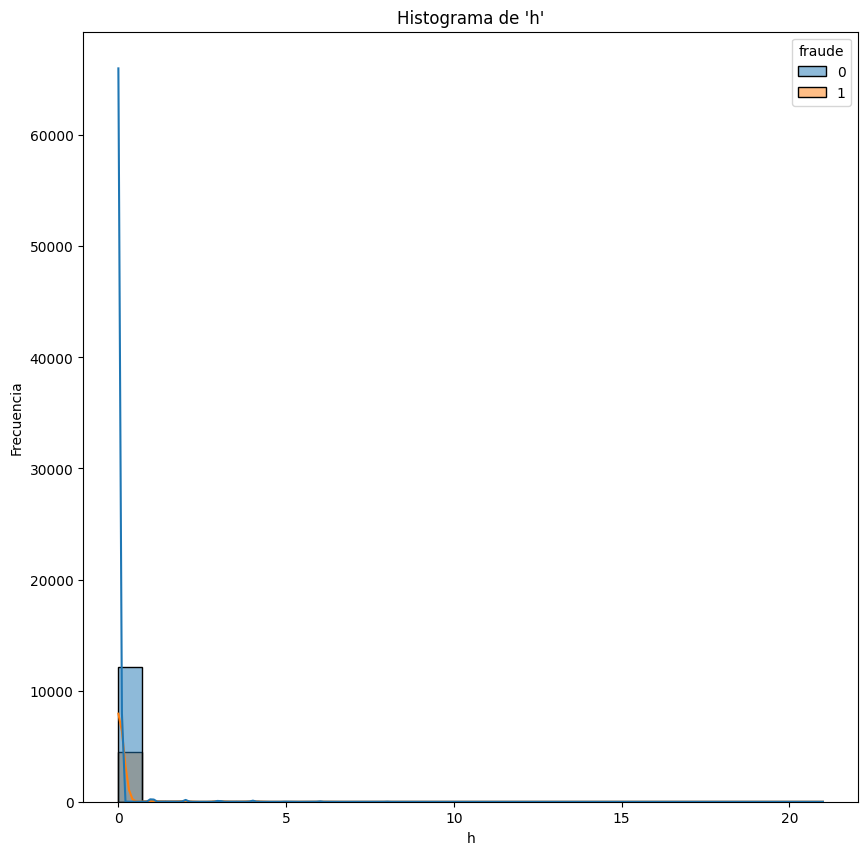

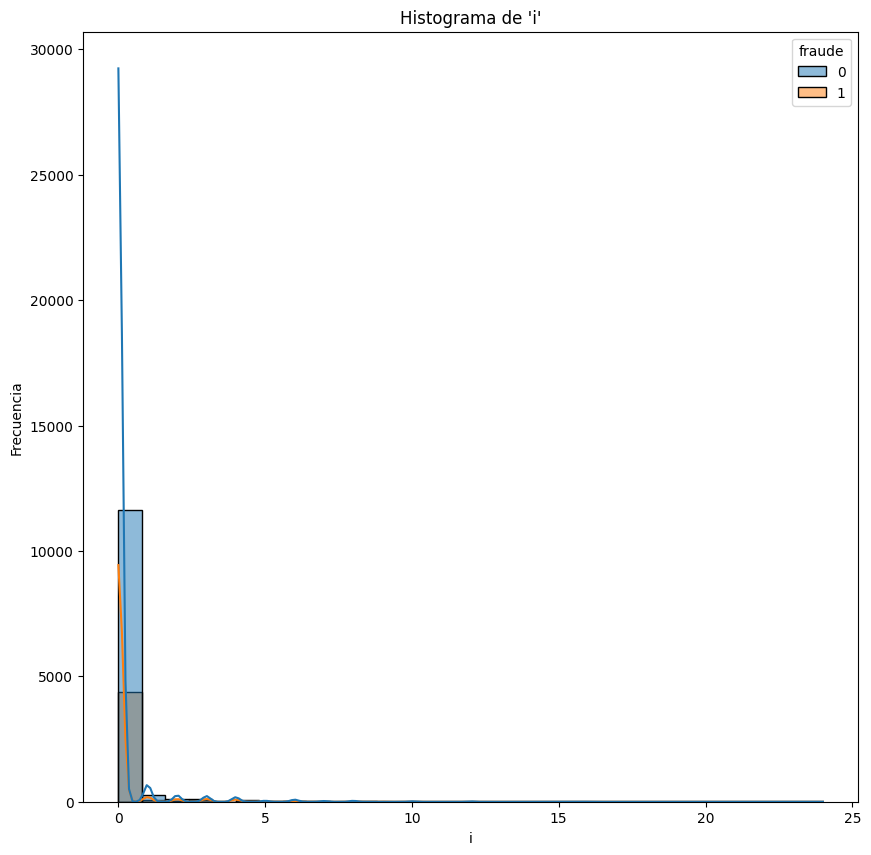

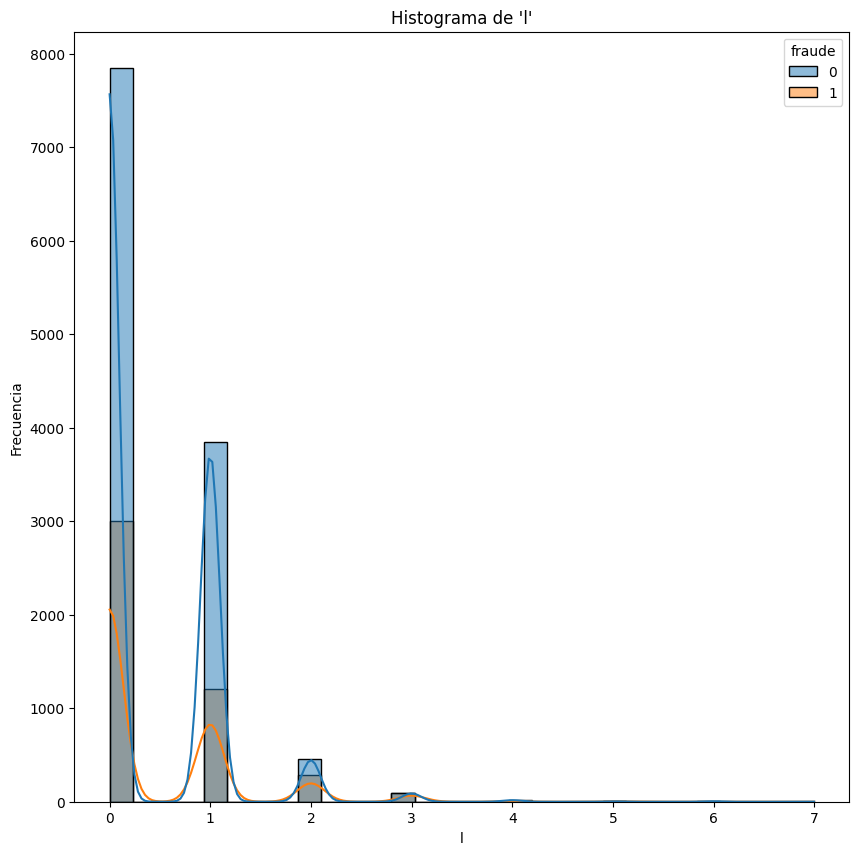

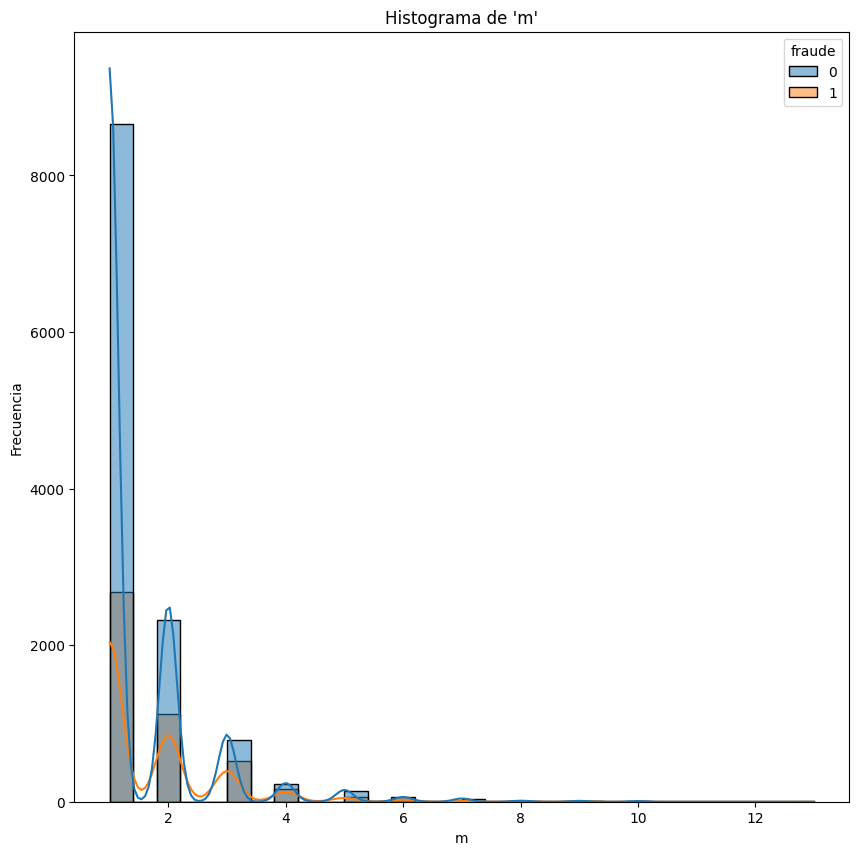

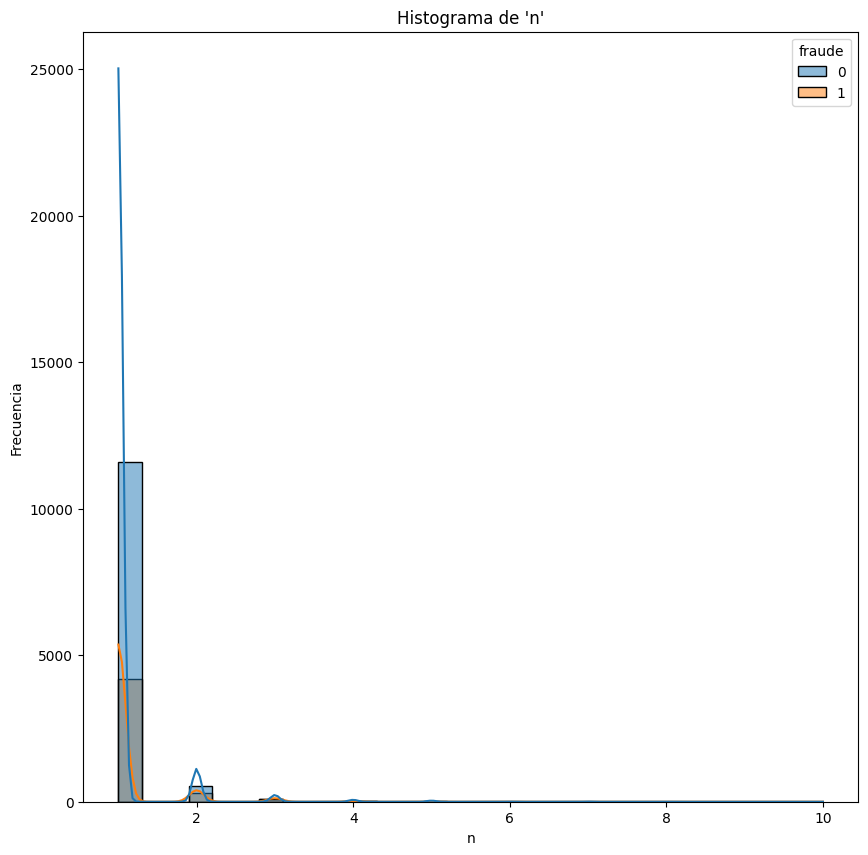

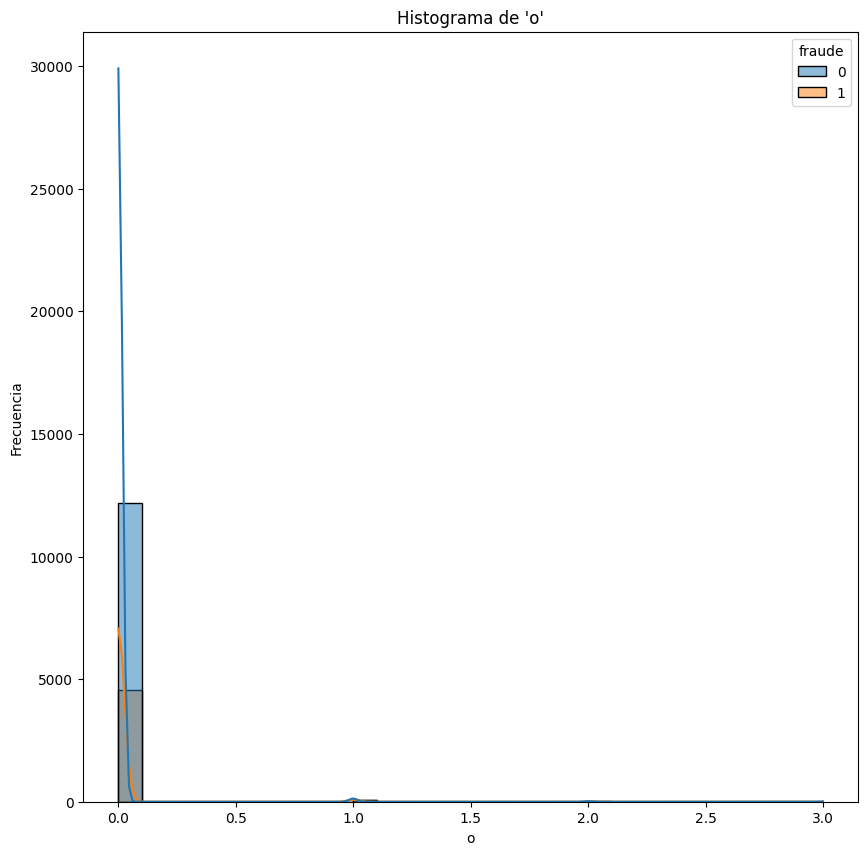

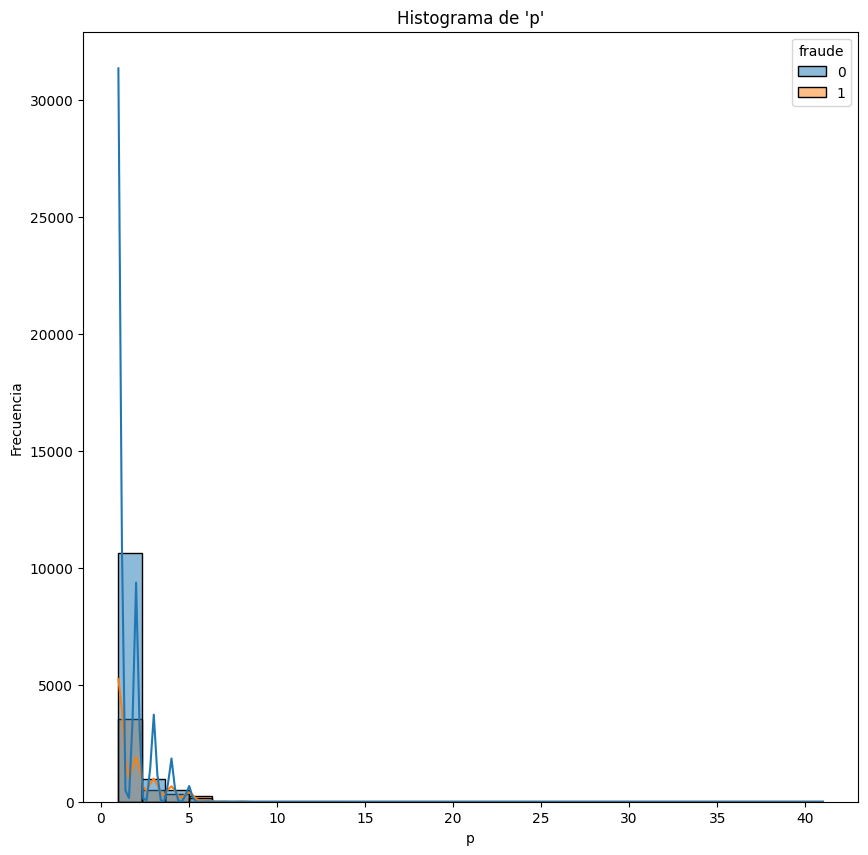

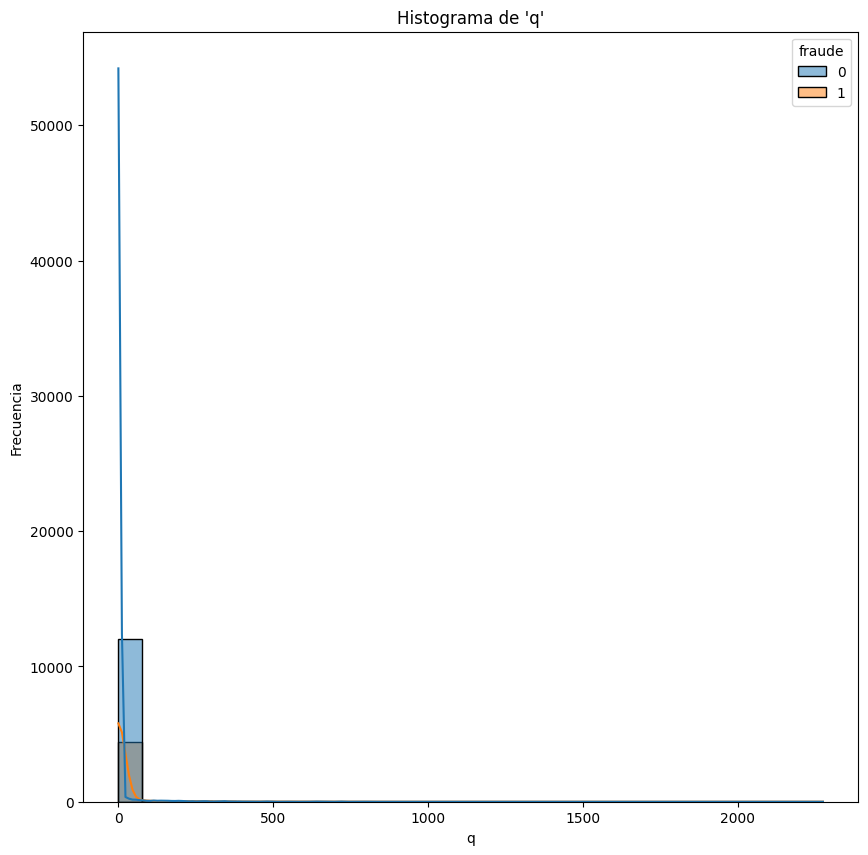

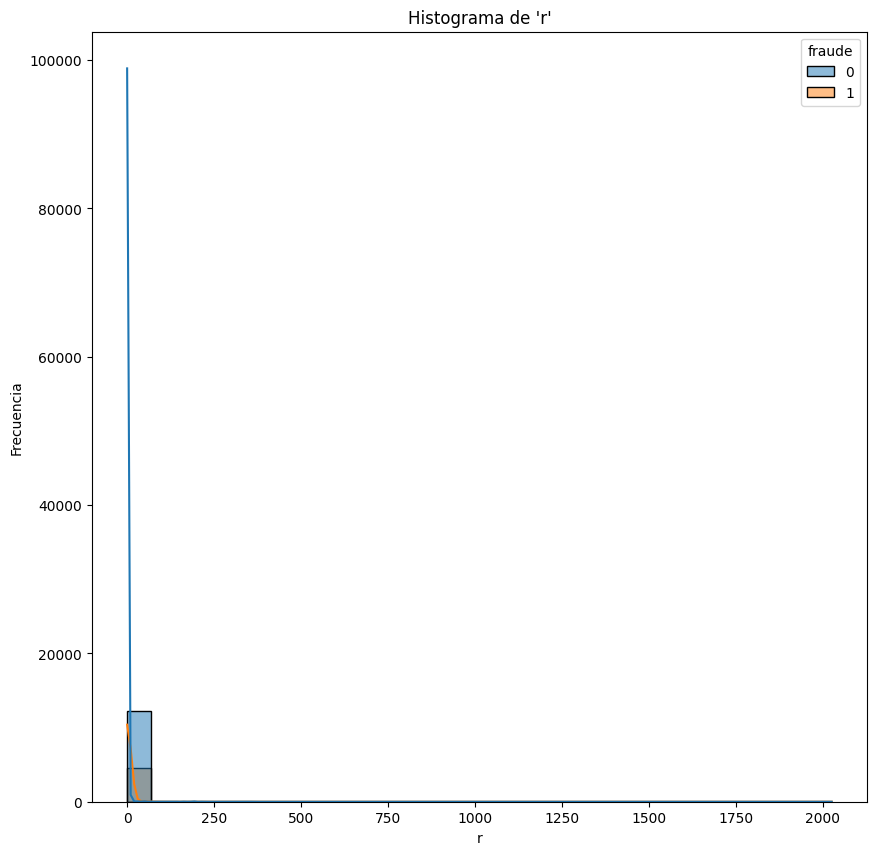

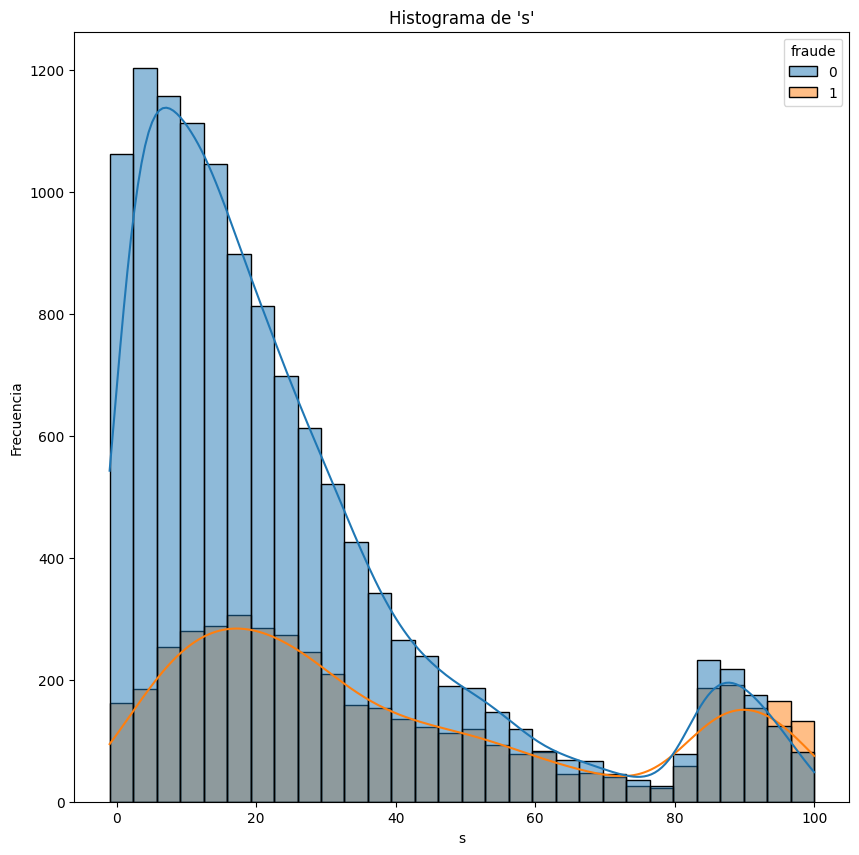

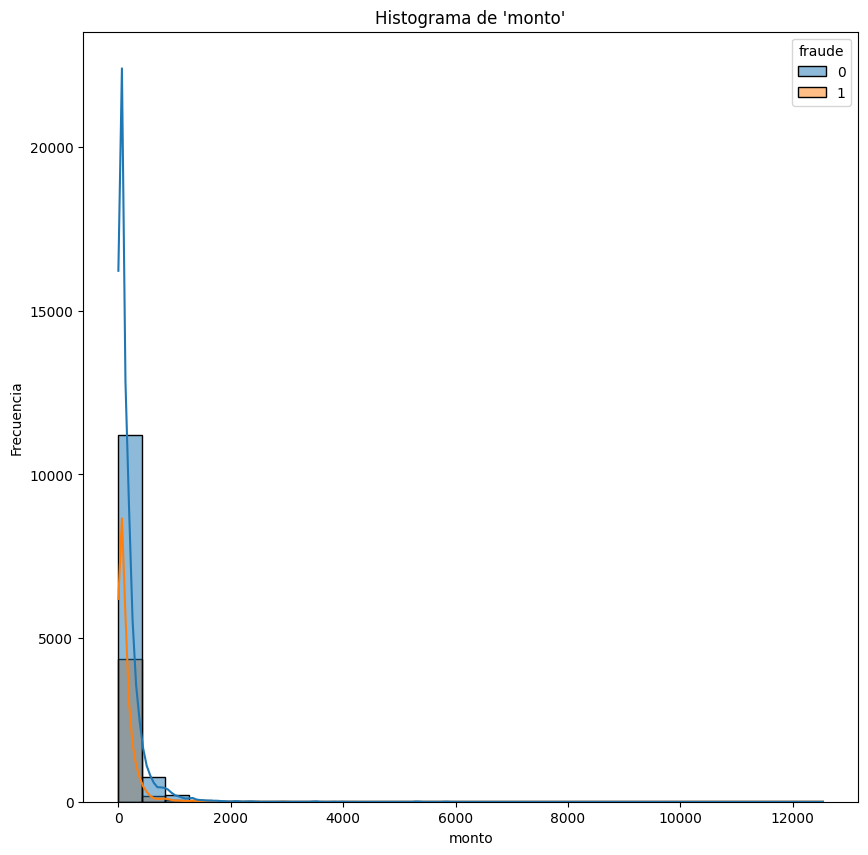

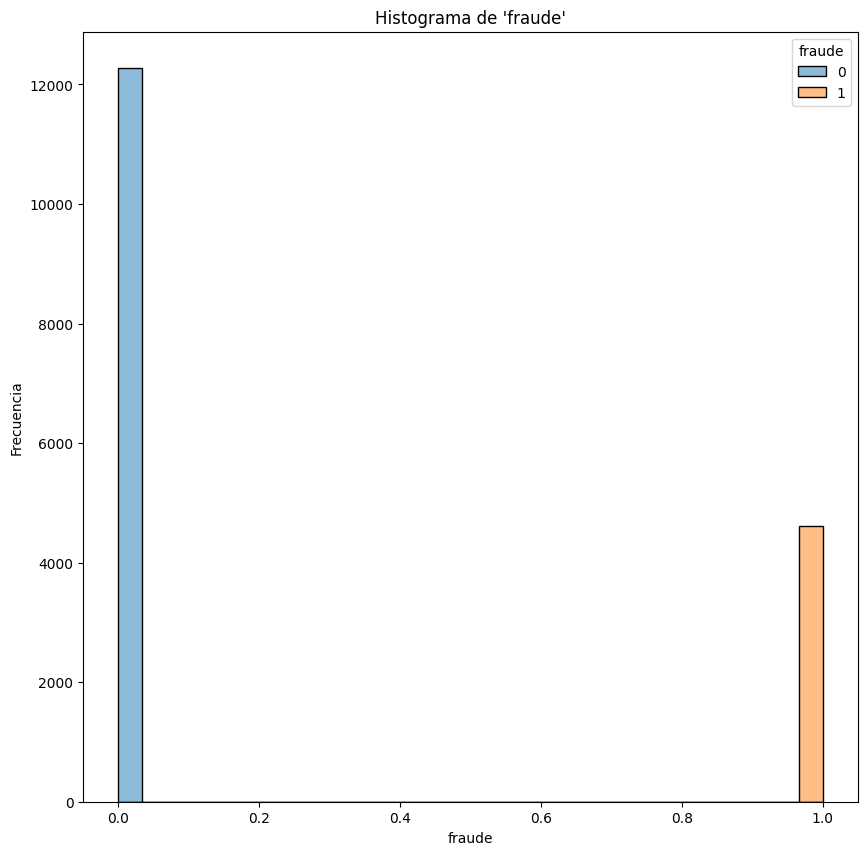

In [38]:
for elemento in datos_numericos.columns:
    graficar_histograma(datos=datos_numericos, columna=elemento, bins=30)

De estos diagramas, sacaremos algunas ideas muy importantes sobre la distribución de las variables con respecto a la variable objetivo, discriminando por clase:

* La columna **b** es una de las que más nos informa sobre la variable objetivo. En este caso, podemos ver que en valores bajos hay más datos pertenecientes a la clase de "no fraudes", mientras que en valores altos, las clases de "fraude" y "no fraude" están más cercanas. De hecho, en los valores más altos, se observa una mayor cantidad de fraudes.

* En las columnas **l**, **m** y **p** podemos decir algo similar: en valores bajos hay menos fraude, y en valores altos hay más fraude.

* Del resto de las columnas no podemos concluir mucho más, ya que las gráficas no son muy claras y parecen estar en un rango muy cercano, lo que dificulta la toma de decisiones.

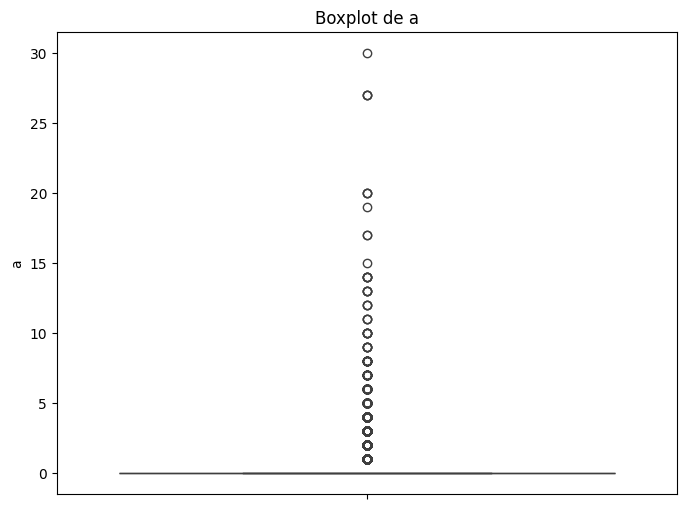

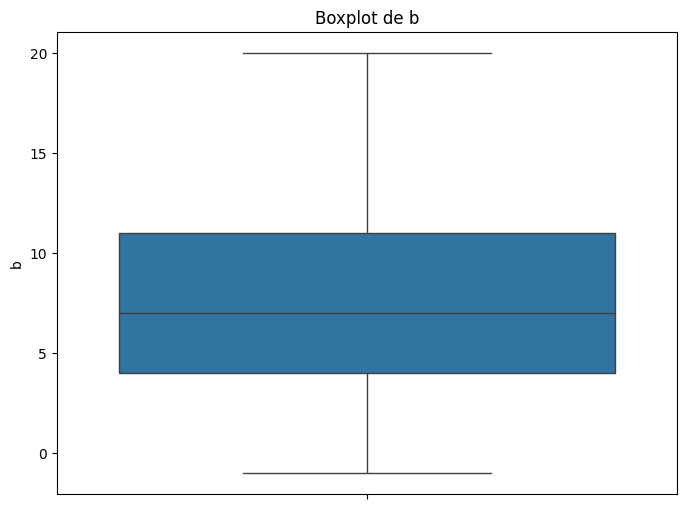

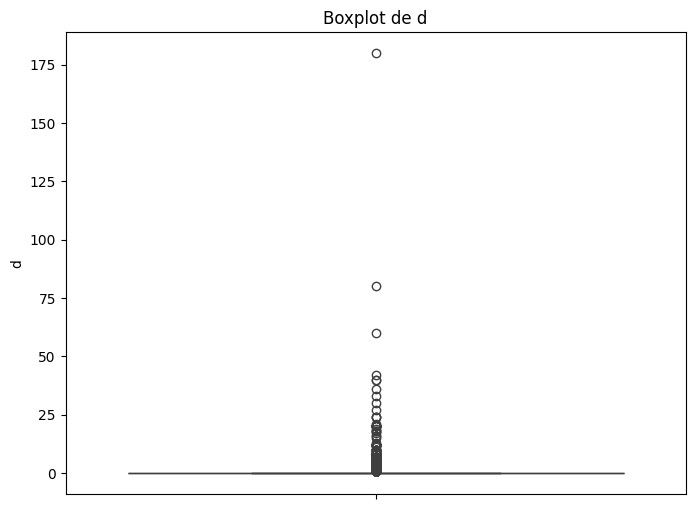

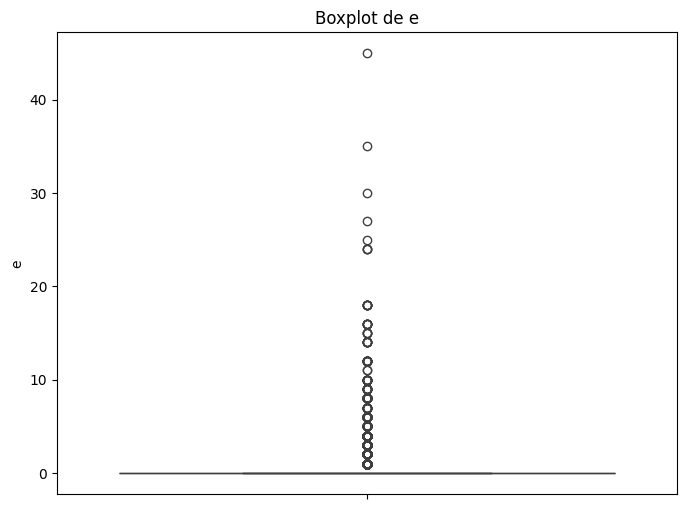

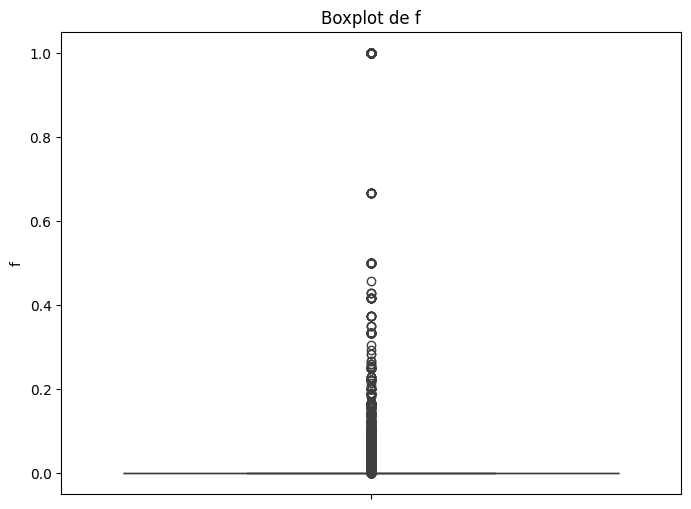

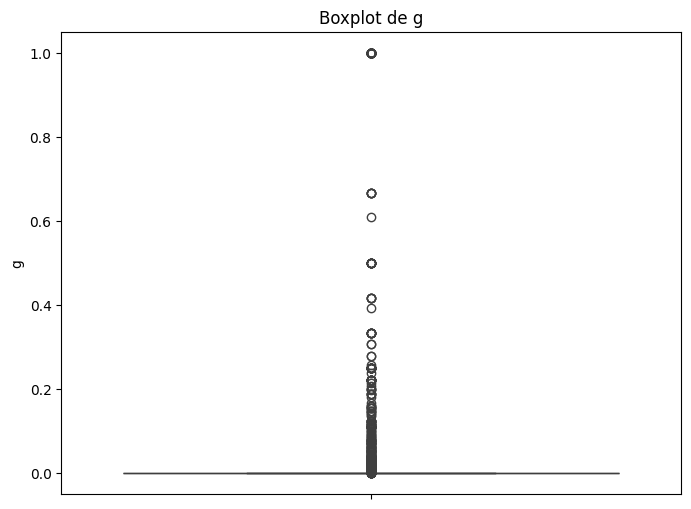

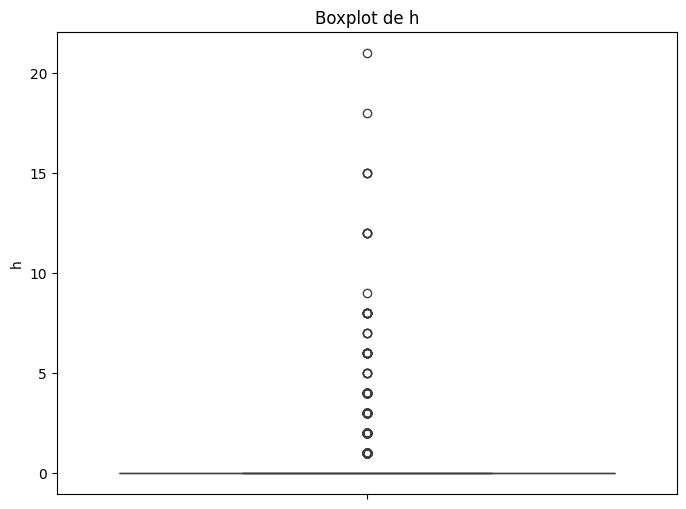

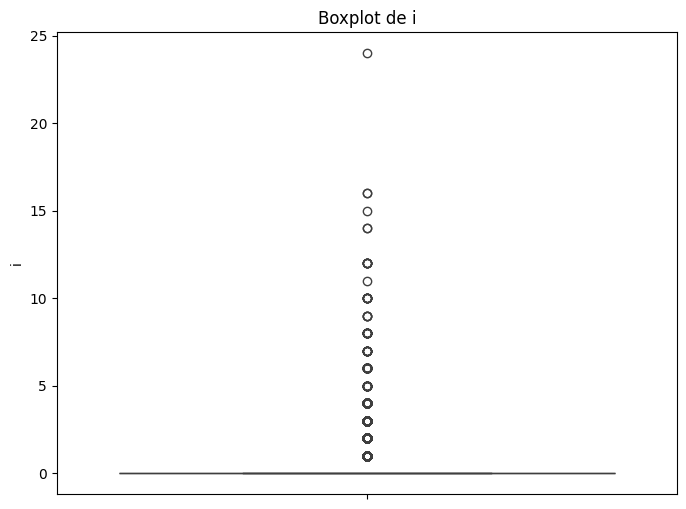

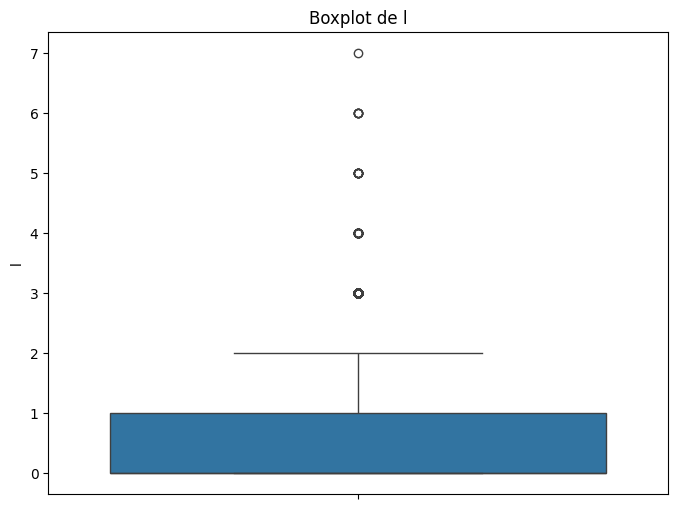

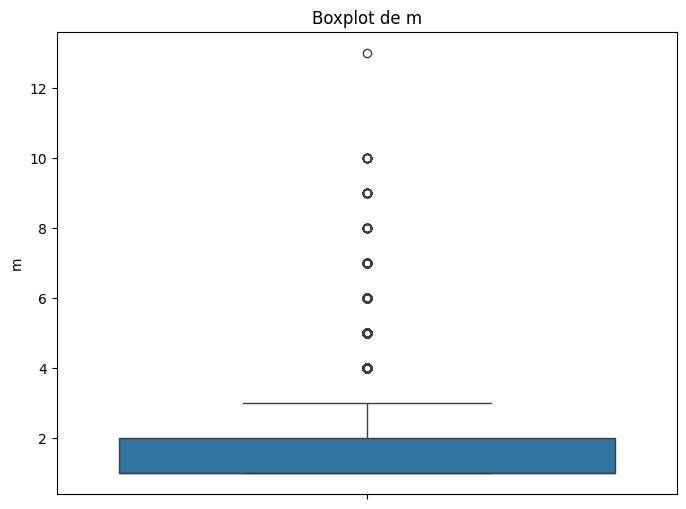

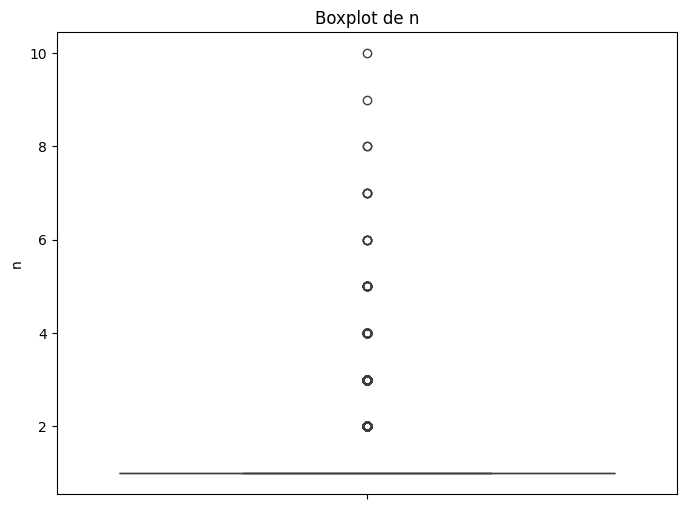

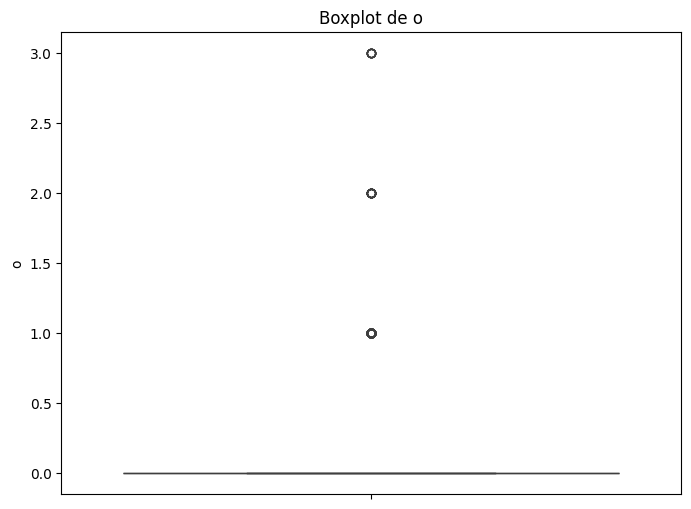

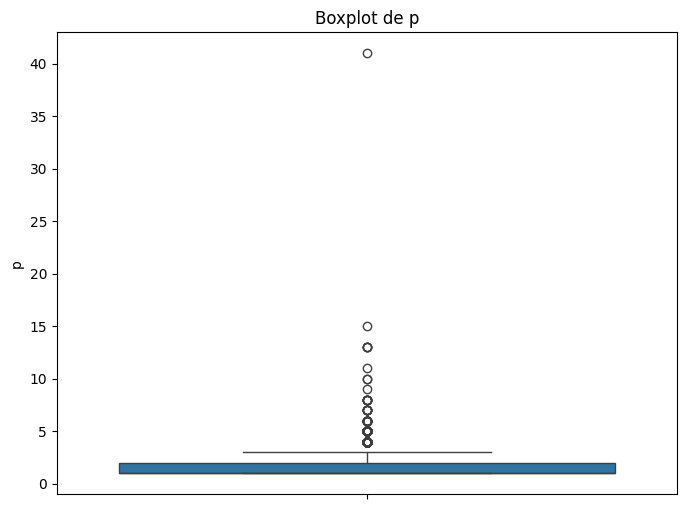

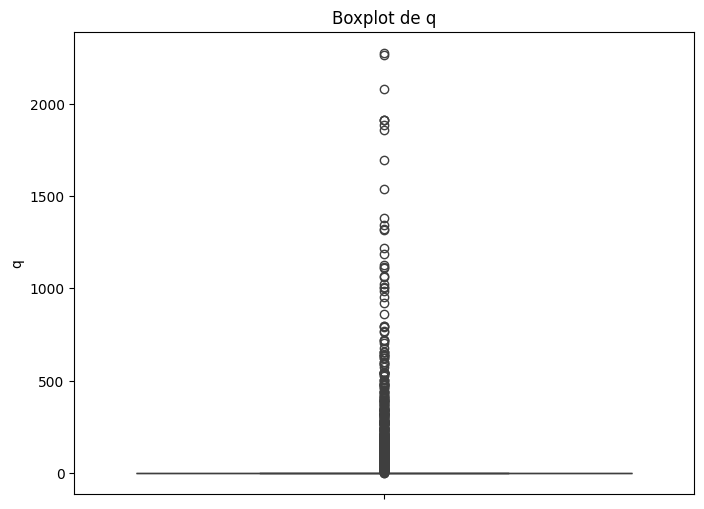

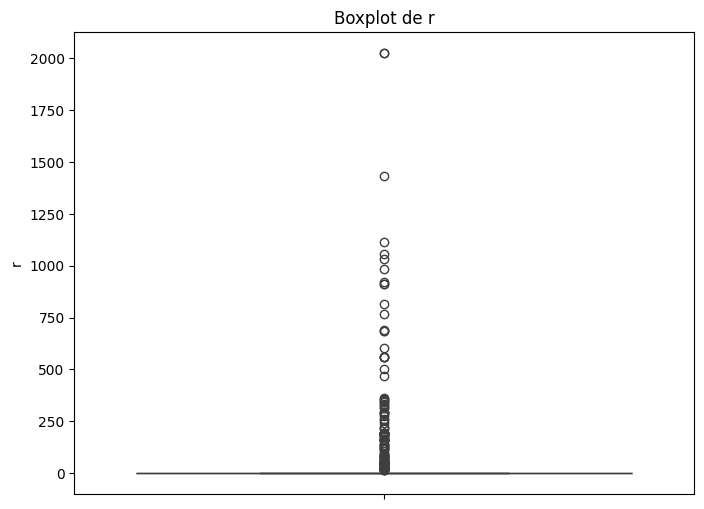

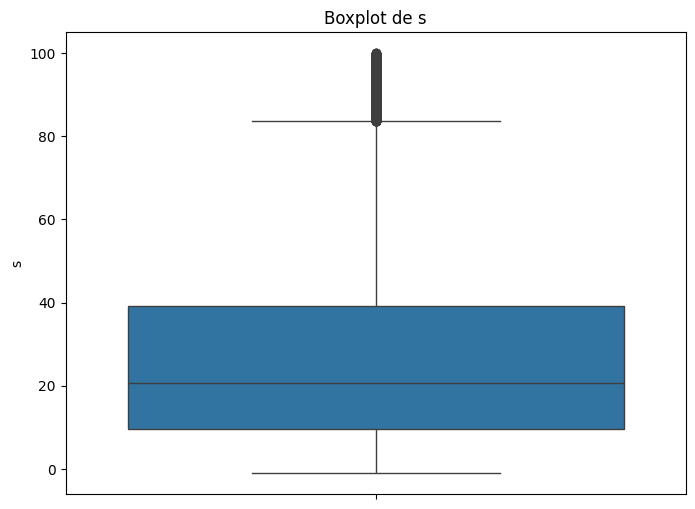

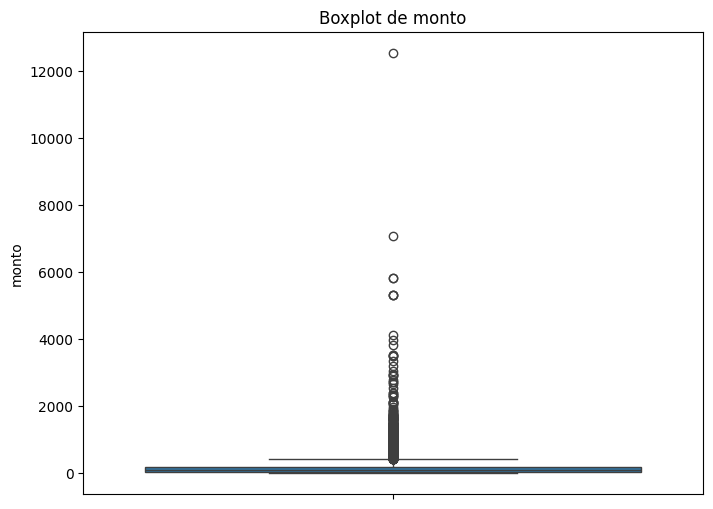

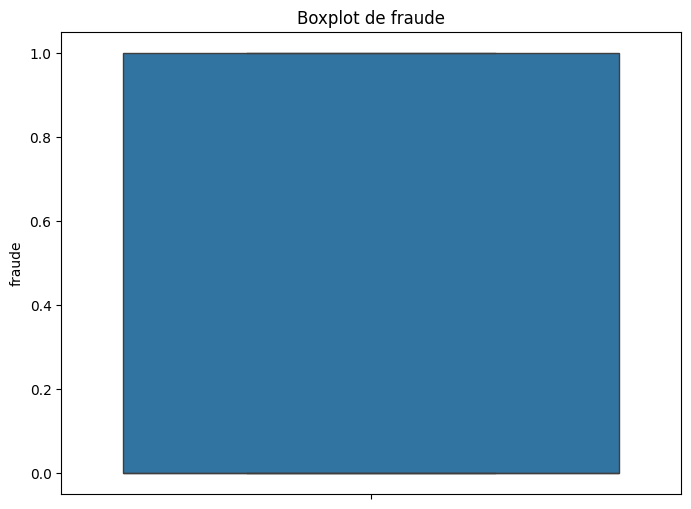

In [39]:
for column in datos_numericos.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=datos_numericos[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Como podemos ver tenemos demasiados datos que son atipicos;

* Impacto en el Análisis y los Modelos: Valores atípicos en una columna pueden afectar considerablemente el rendimiento y la precisión de los modelos de Machine Learning, especialmente en algoritmos sensibles a ellos, como regresiones lineales o redes neuronales. Para mejorar el rendimiento del modelo, es posible que necesites aplicar técnicas de tratamiento de outliers (por ejemplo, normalización, eliminación o transformación de valores atípicos) o usar algoritmos menos sensibles, como los árboles de decisión.

* Identificación de Patrones Anómalos: Una columna con varios valores atípicos podría señalar un patrón de comportamiento inusual que podría ser relevante para análisis de fraudes, detección de anomalías o control de calidad. En tales casos, estos registros pueden ser útiles para entrenar modelos específicos de detección de anomalías.

* Consideración de Escalado y Transformación: Si los datos contienen muchos valores atípicos en una fila, es posible que necesites escalarlos o transformarlos (por ejemplo, usando logaritmos o escalado robusto) para reducir el efecto de estos valores en el análisis.

Ahora vamos a habla de la correlación de Pearson debido a que es una medida estadística que evalúa la fuerza y dirección de la relación lineal entre dos variables numéricas. Es muy útil en análisis de datos porque ayuda a entender si y cómo dos variables están relacionadas entre sí.

La Correlación de Pearson tiene va de -1 a 1.
* +1 significa una correlación lineal positiva perfecta: a medida que una variable aumenta, la otra también lo hace de manera proporcional.
* -1 significa una correlación lineal negativa perfecta: a medida que una variable aumenta, la otra disminuye de manera proporcional.
*  0 indica que no hay correlación lineal entre las variables (no están relacionadas linealmente).

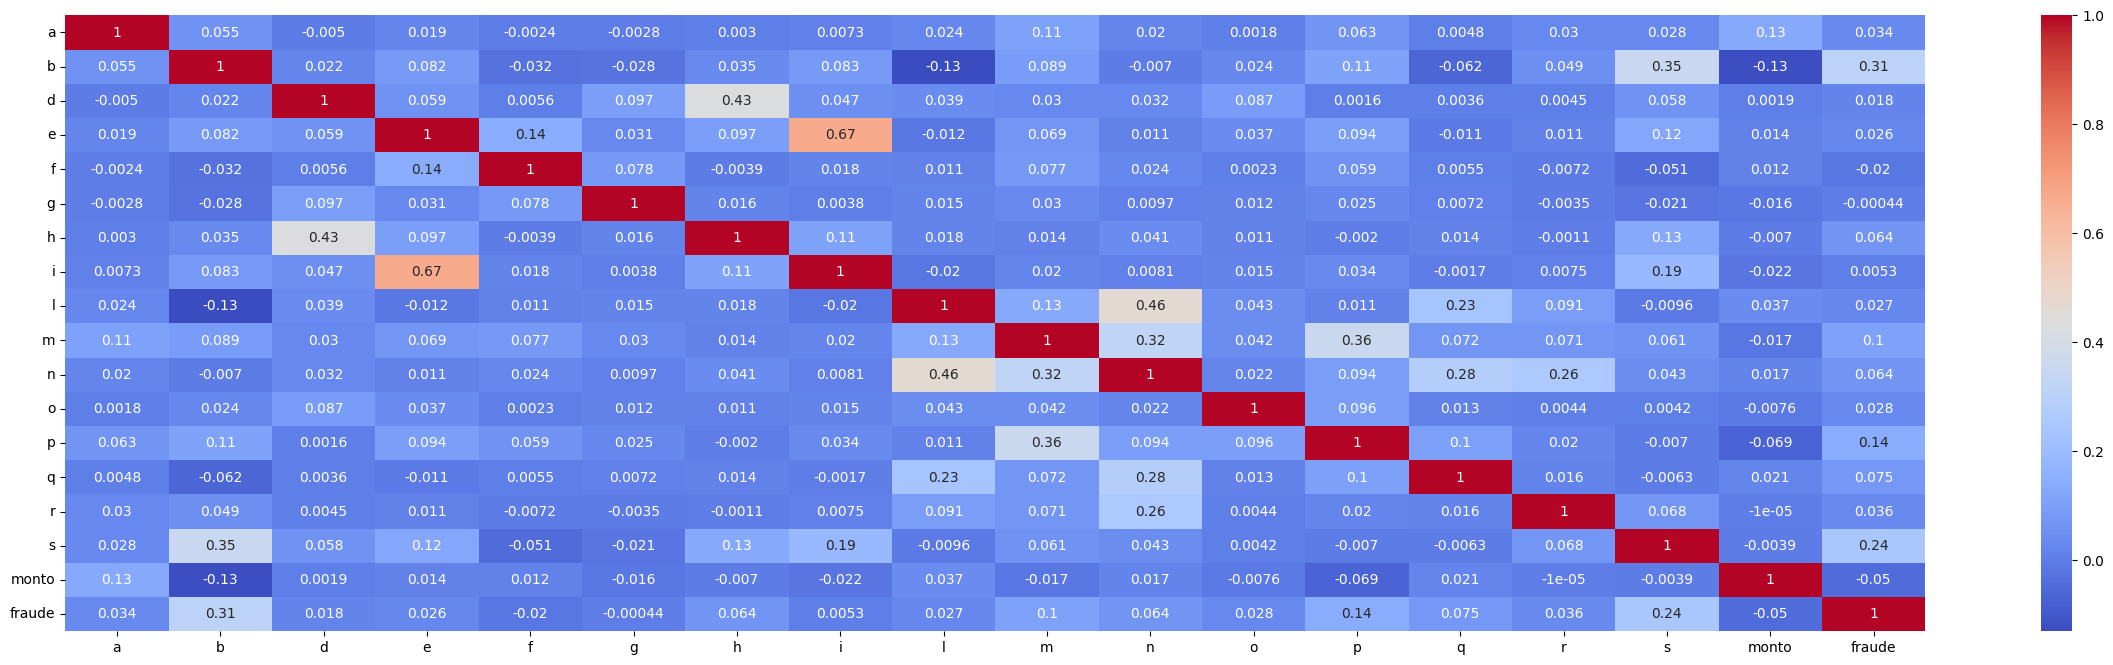

In [40]:
plt.figure(figsize=(30,8))
sns.heatmap(datos_numericos.corr(),cmap='coolwarm',annot = True)
plt.show()

La **correlación de Spearman** mide la **fuerza y dirección de una relación monotónica** entre dos variables. A diferencia de la correlación de Pearson, que solo captura relaciones lineales, la correlación de Spearman es más general y funciona bien para relaciones no lineales, siempre y cuando sean monotónicas (cuando una variable aumenta o disminuye constantemente respecto a la otra, aunque no de forma proporcional).

### Características de la Correlación de Spearman
- **Valores posibles**: Va de **-1 a 1** (igual que Pearson).
  - **+1** indica una relación monotónica positiva perfecta: cuando una variable sube, la otra también sube.
  - **-1** indica una relación monotónica negativa perfecta: cuando una variable sube, la otra baja.
  - **0** indica que no hay relación monotónica entre las variables.

- **Cómo funciona**: La correlación de Spearman se calcula a partir de los **rangos** de los datos (en lugar de los valores originales). Esto la hace menos sensible a valores atípicos y adecuada para datos que no siguen una relación lineal.

### ¿Para qué sirve la Correlación de Spearman?
1. **Detectar relaciones monotónicas**: Spearman es útil cuando sospechas que las variables tienen una relación consistente (una sube mientras la otra sube o baja), pero no necesariamente lineal. 

2. **Trabajar con datos no lineales**: Si tienes variables que están relacionadas de manera no lineal, como en relaciones cuadráticas o exponenciales, la correlación de Spearman puede captar esta relación mejor que Pearson.

3. **Resistente a valores atípicos**: Como Spearman se basa en rangos, es menos afectado por valores atípicos que Pearson. Esto es útil en conjuntos de datos donde existen valores extremos que podrían distorsionar la relación entre las variables.

4. **Usar variables ordinales**: En datos ordinales (donde las variables representan categorías con orden, pero no necesariamente con distancias iguales), Spearman es adecuado, ya que solo utiliza el orden de los valores.

### Ejemplo en análisis de datos
Supongamos que en un análisis de fraude encuentras que la variable "monto de transacción" tiene una relación compleja con la variable "fraude" (por ejemplo, transacciones muy pequeñas y muy grandes podrían tener diferentes patrones de fraude). Si esta relación no es lineal, la correlación de Pearson podría ser inadecuada, pero la correlación de Spearman podría capturar la tendencia monotónica, mostrando que a ciertos rangos de "monto de transacción" hay una mayor incidencia de fraude.

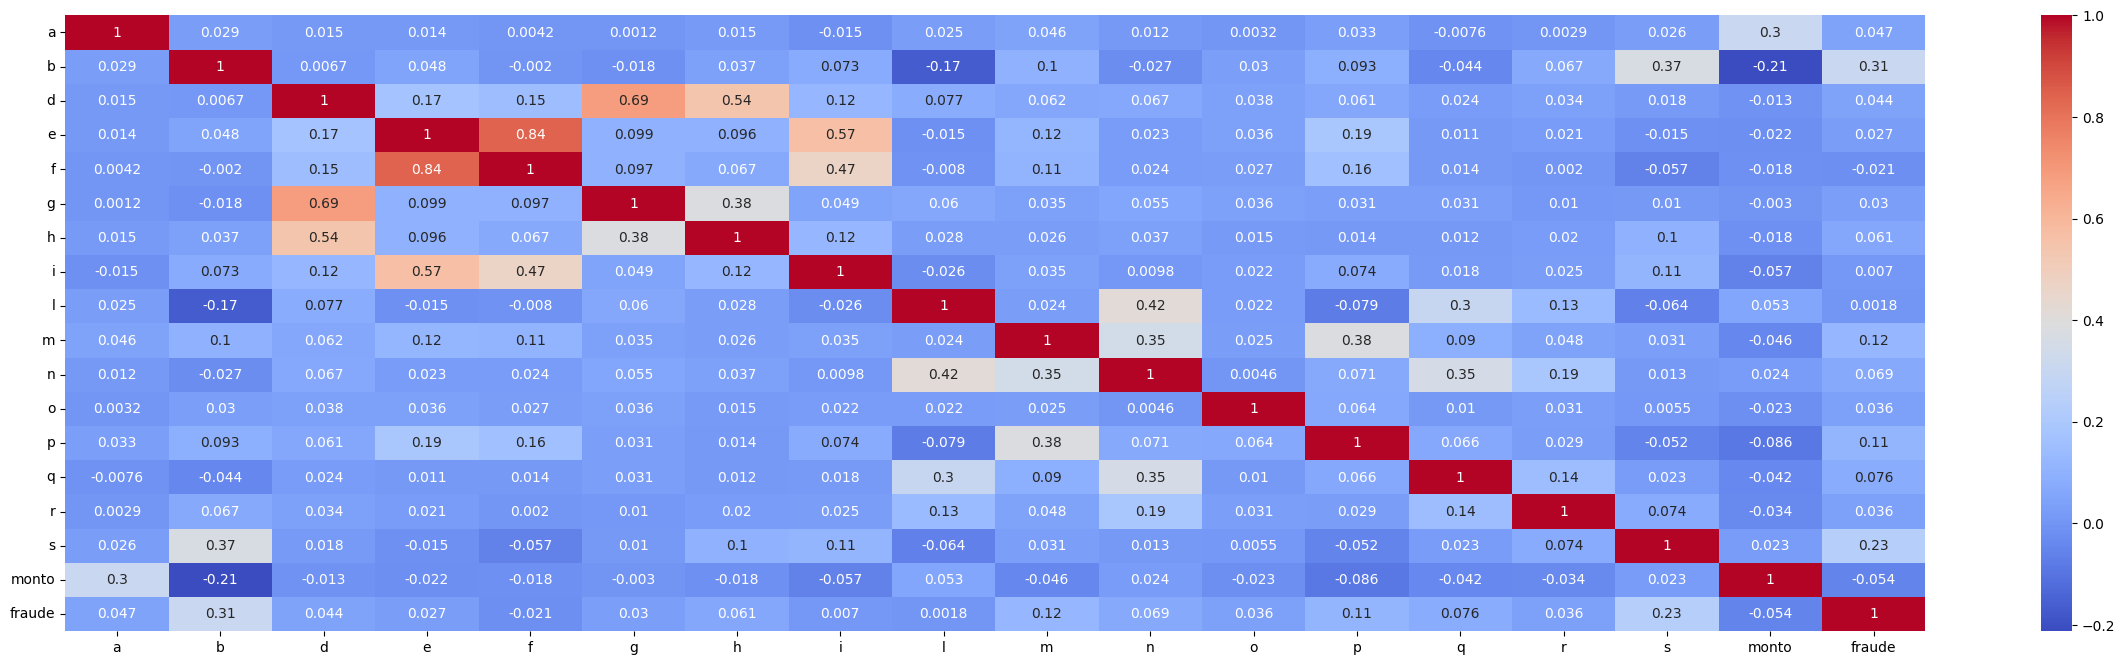

In [41]:
plt.figure(figsize=(30,8))
sns.heatmap(datos_numericos.corr(method="spearman"),cmap='coolwarm',annot = True)
plt.show()

In [74]:
correlaciones=pd.DataFrame({'columnas':datos_numericos.columns,'correlacion_person':datos_numericos.corr()['fraude'],'correlacion_sperman':datos_numericos.corr(method="spearman")['fraude']})
#correlaciones.sort_values('correlacion_person',ascending=False,inplace=True)
correlaciones

,columnas,correlacion_person,correlacion_sperman
a,a,0.034159,0.047434
b,b,0.307906,0.306547
d,d,0.018145,0.044352
e,e,0.026134,0.026666
f,f,-0.020182,-0.021410
g,g,-0.000444,0.029561
h,h,0.064364,0.061043
i,i,0.005266,0.006980
l,l,0.027128,0.001840
m,m,0.103776,0.123307


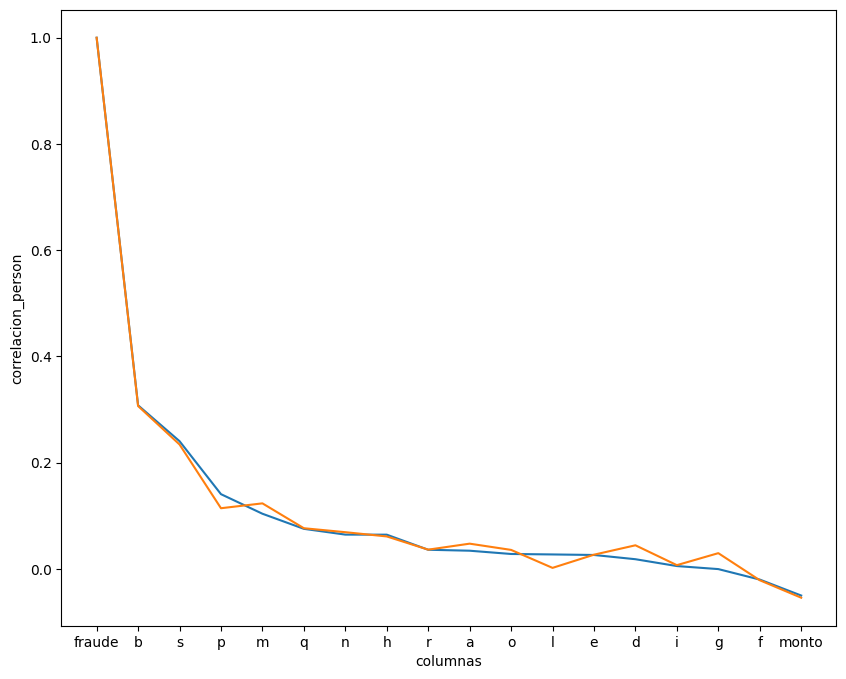

In [43]:
plt.figure(figsize=(10,8))
sns.lineplot(x='columnas',y='correlacion_person',data=correlaciones)
sns.lineplot(x='columnas',y='correlacion_sperman',data=correlaciones)
plt.xticks(rotation=0)
plt.show()

## datos categoricos


Ahora hagamos un tratado de datos especiales para los datos string que en este caso solo tenemos lo de los paises

In [44]:
datos_categoricos = datos.select_dtypes(include=['object'])
datos_categoricos["fraude"] = datos["fraude"]

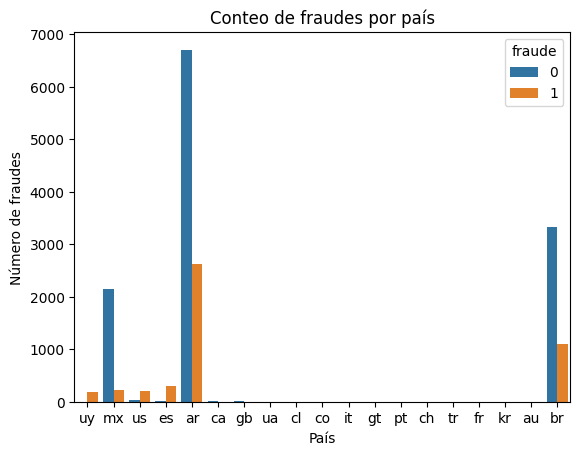

In [45]:
sns.countplot(data=datos_categoricos, x='j',hue='fraude')
plt.title('Conteo de fraudes por país')
plt.xlabel('País')
plt.ylabel('Número de fraudes')
plt.show()


Como podemos apreciar, es interesante observar que en países como Uruguay, México y Estados Unidos hay una mayor probabilidad de que la transacción sea fraudulenta. Esto podría traer problemas, ya que podría afectar la reputación de algunos países. Sin embargo, es un dato importante que merece ser mencionado.



In [46]:
paises=datos_categoricos['j'].value_counts()
paises_name=paises.index
paises_con__fraude=datos_categoricos.groupby('j')['fraude'].sum()
paises_sin__reafude=datos_categoricos.groupby('j')['fraude'].count()-datos_categoricos.groupby('j')['fraude'].sum()

In [47]:
frme_paises=pd.DataFrame({'paises':paises_name,'cantidad':paises,'fraude':paises_con__fraude,'sin_fraude':paises_sin__reafude})
frme_paises

,paises,cantidad,fraude,sin_fraude
j,,,,
ar,ar,9329,2626,6703
au,br,1,0,1
br,mx,4428,1099,3329
ca,es,12,0,12
ch,us,1,0,1
cl,uy,1,0,1
co,ca,1,0,1
es,gb,314,295,19
fr,gt,2,0,2


No obstante, esta categoría resulta ser muy sensible porque hay países donde solo se registran datos de fraude, lo que puede hacer que el modelo se sobreajuste fácilmente. Esto se debe a que, cada vez que una persona elige un país donde hubo fraudes, el programa podría asociar automáticamente que se trata de fraude, aunque los nuevos datos indiquen lo contrario.

En este caso, la solución que he pensado es la siguiente: si agrupamos países por regiones, sería poco práctico porque no hay suficiente cantidad de países para representar adecuadamente una región. Además, si los agrupo de otra forma, seguiría siendo muy desbalanceado debido a que hay países que no tienen muestras de ambas clases. Por lo tanto, he decidido clasificar los países en tres clases:

* **Alta probabilidad de fraude**: serán los países con más casos de fraude que de no fraude.
* **Media probabilidad de fraude**: serán los países donde el índice de fraude está cercano al índice de no fraude.
* **Baja probabilidad de fraude**: serán los países en los que no se registraron fraudes.

In [102]:
# funcion para calcular los nuevos indices 

def porcentaje_fraude(cantidad_datos:list, fraude:list):
    clase_asignada=[]
    for index in range(len(cantidad_datos)):
        if fraude[index] == 0:
            clase_asignada.append(0)
        else:
            porcentaje=(fraude[index]*100)/cantidad_datos[index] 
            if porcentaje <= 55 and porcentaje>=45:
                clase_asignada.append(1)
            else: 
                clase_asignada.append(2) 
    return clase_asignada

cantidad_de_datos=list(frme_paises["cantidad"])
cantidad_de_fraude=list(frme_paises["fraude"])
asigacion_calse=porcentaje_fraude(cantidad_datos=cantidad_de_datos,fraude=cantidad_de_fraude)

frme_paises["clase_perteneciente"]=asigacion_calse
frme_paises

,paises,cantidad,fraude,sin_fraude,clase_perteneciente
j,,,,,
ar,ar,9329,2626,6703,2
au,br,1,0,1,0
br,mx,4428,1099,3329,2
ca,es,12,0,12,0
ch,us,1,0,1,0
cl,uy,1,0,1,0
co,ca,1,0,1,0
es,gb,314,295,19,2
fr,gt,2,0,2,0


Como podemos apreciar, nos damos cuenta de que solo nos quedan dos clases porque los datos de fraude y no fraude tampoco están balanceados. Entonces, solo tenemos dos clases, que serán: alta probabilidad de fraude y baja probabilidad de fraude.

## Etapa 2
## Limpieza de datos